<h3>Problem Statment: Breast Cancer Prediction</h3>

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)
11. Target Class distribution: 357 benign, 212 malignant

Dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Algorithms used: 
1. Support Vector Machine
2. K Nearest Neighbors
3. Logistic Regression

<h3>Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score

<h3>Reading Dataset

In [2]:
data=pd.read_csv("breast.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
data.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


B    357
M    212
Name: diagnosis, dtype: int64


<AxesSubplot:>

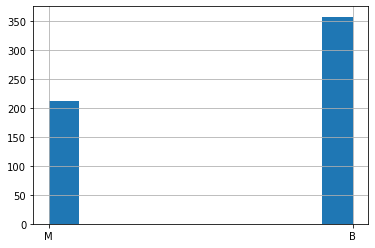

In [6]:
print(data['diagnosis'].value_counts())
data['diagnosis'].hist()

<h3>Dropping features that are not required like patient id and Unnamed 32 columns

In [7]:
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [8]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h3>Checking for Missing values in the Dataset

In [9]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<h3>Splitting of Data into Independent and Dependent Variables

In [10]:
X=data.iloc[:,1:]
Y=data.iloc[:,0]

In [11]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
Y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

<h3>Feature Scaling of Data

In [13]:
standardScaler = StandardScaler()
X=standardScaler.fit_transform(X)

<h3>Test Train Split

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

<h3>Logistic Regression Model

In [15]:
def logistic(X_train,Y_train,X_test,Y_test):
    log_model=LogisticRegression()
    log_model.fit(X_train,Y_train)
    y_pred=log_model.predict(X_test)
    print("Accuracy using Logistic Regression:",accuracy_score(Y_test,y_pred))

<h3>K Nearest Neighbors

In [16]:
def findK(X_train,Y_train,X_test,Y_test):
    k=[i for i in range(1,31)]
    accuracy=[]
    
    for i in k:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, Y_train)
        y_pred = knn.predict(X_test)
        accuracy.append(accuracy_score(Y_test, y_pred))
        
    plt.xlabel("Value of K")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs K Value")
    plt.plot(k,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
    
    max_accuracy=max(accuracy)
    return accuracy.index(max(accuracy))+1

def knn(X_train,Y_train,X_test,Y_test,K):
    knn = KNeighborsClassifier(n_neighbors=8)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    print("Accuracy using K Nearest Neighbors:",accuracy_score(Y_test, y_pred),"with k=",K)

<h3>Support Vector Machine

In [17]:
def SVM(X_train,Y_train,X_test,Y_test):
    #linear kernel
    linearsvm= svm.SVC(kernel='linear')
    linearsvm.fit(X_train,Y_train)
    y_hat_linear=linearsvm.predict(X_test)
    print("Accuracy using linear kernel:",accuracy_score(Y_test, y_hat_linear))
    #poly kernel
    polysvm= svm.SVC(kernel='poly')
    polysvm.fit(X_train,Y_train)
    y_hat_poly=polysvm.predict(X_test)
    print("Accuracy using poly kernel:",accuracy_score(Y_test, y_hat_poly))
    #rbf kernel
    rbfsvm = svm.SVC(kernel='rbf')
    rbfsvm.fit(X_train,Y_train)
    y_hat_rbf=rbfsvm.predict(X_test)
    print("Accuracy using rbf kernel:",accuracy_score(Y_test, y_hat_rbf))

<h3>Finding Accuracies for all Models

Accuracy using Logistic Regression: 1.0
Accuracy using K Nearest Neighbors: 0.9824561403508771 with k= 3
Accuracy using linear kernel: 0.9912280701754386
Accuracy using poly kernel: 0.9210526315789473
Accuracy using rbf kernel: 0.9736842105263158


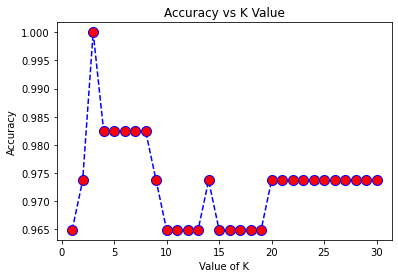

In [18]:
logistic(X_train,Y_train,X_test,Y_test)
knn(X_train,Y_train,X_test,Y_test,findK(X_train,Y_train,X_test,Y_test))
SVM(X_train,Y_train,X_test,Y_test)

<h3>Final Result</h3>
<table>
  <tr>
    <th>Algorithm</th>
    <th></th>
    <th>Accuracy</th>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td></td>
    <td>1.0</td>
  </tr>
  <tr>
    <td>SVM</td>
    <td>linear kernel</td>
    <td>0.991</td>
  </tr>
  <tr>
    <td>SVM</td>
    <td>poly kernel</td>
    <td>0.921</td>
  </tr>
  <tr>
    <td>SVM</td>
    <td>rbf kernel</td>
    <td>0.973</td>
  </tr>
  <tr>
    <td>KNN</td>
    <td>nearest neighbors=3</td>
    <td>0.982</td>
  </tr>
    
</table> 